# MEE4006 CFD Lab
# Exercise 1

# This code solves the 1D heat conduction equation with fixed temperatures at both ends (Dritchlet type), without sources

## Governing equation
$\frac{\partial }{\partial x} \left ( k \frac{\partial T}{\partial x} \right )= 0 $

## Domain and material
$x \in [0,1]$

$k_{Aluminium} = 235.0 W/K $

## Boundary conditions
At $x=0, T_0 = 373 K$ 



At $x=1, T_1 = 303 K$

## Grid 

Find the optimal number of points needed to obtain grid converged solution.

## Numerical method

We implement the spacing marching method in space, using second-order central difference.

$ k \frac{\partial^2 T}{\partial x^2} = k \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2}$

Since, 

$ k \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2} = 0 $

$T_i = \frac{T_{i+1}+T_{i-1}}{2}$


## Error

We find the L2-norm of the error i.e., the rate at which the solution changes

$ L_2 Norm = \sqrt{ \Sigma x_i^2 } $


# Exercise
## 1. Generate the line plot, and the contour plot, for T_left=150K, T_right = 500K
## 2. Report the convergence if we take 201 points, how many iterations does it take to converge to an error of 1e-2
## 3. Comment on the effect of grid size on the rate of convergence

In [2]:
import numpy as np # math library
import matplotlib.pyplot as plt # library for plotting
np.set_printoptions(precision=10) # sets the prcision for numbers - while printing

In [3]:
# Define parameters
N = 101
max_error = 1e-3 # the error at which the iteration should stop
max_iter = 12000

T_left = 373.0
T_right = 303.0
T_guess = 300.0

In [4]:
error = np.zeros(max_iter,dtype=np.float64)

In [5]:
# create grid from [0,N-1]
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(0.0, 1.0, N, endpoint=True, dtype=np.float64) 
dx = x[1]-x[0]
print('dx = ',dx)
x

dx =  0.01


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [6]:
# Create the data arrays
T = np.linspace(T_guess, T_guess, N, dtype=np.float64)
T_old = np.linspace(T_guess, T_guess, N, dtype=np.float64 )

In [204]:
T

array([300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300.])

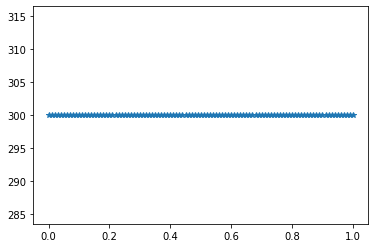

In [205]:
# plot initial condition
plt.plot(x,T,'*')

In [9]:
for i in range(0,max_iter):
    T_old = T.copy() # copy one array to another
    
    # set BCs
    T_old[0] = T_left
    T_old[N-1] = T_right

    # apply the difference formula
    for j in range(1,N-1): # note excludes N-1
        T[j] = ( T_old[j+1]+T_old[j-1] ) / 2.0

    # set BCs        
    T[0] = T_left
    T[N-1]=T_right
    
    # compute error
    # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
    # https://numpy.org/doc/stable/reference/generated/numpy.subtract.html
    error[i]=np.linalg.norm(np.subtract(T,T_old),2) 
    
    if(error[i] >= max_error):
        print('Iteration = ',i,'Error = %10.8f' % error[i])
    else:
        print('Iteration = ',i,'Error = %10.8f' % error[i])
        print('Converged')
        break
    

Iteration =  0 Error = 12.91559135
Iteration =  1 Error = 10.21067150
Iteration =  2 Error = 8.54286069
Iteration =  3 Error = 7.39833438
Iteration =  4 Error = 6.55792251
Iteration =  5 Error = 5.91123147
Iteration =  6 Error = 5.39619136
Iteration =  7 Error = 4.97504262
Iteration =  8 Error = 4.62340848
Iteration =  9 Error = 4.32480262
Iteration =  10 Error = 4.06764961
Iteration =  11 Error = 3.84356761
Iteration =  12 Error = 3.64632839
Iteration =  13 Error = 3.47120121
Iteration =  14 Error = 3.31452407
Iteration =  15 Error = 3.17341520
Iteration =  16 Error = 3.04557375
Iteration =  17 Error = 2.92913904
Iteration =  18 Error = 2.82258901
Iteration =  19 Error = 2.72466577
Iteration =  20 Error = 2.63432011
Iteration =  21 Error = 2.55066948
Iteration =  22 Error = 2.47296581
Iteration =  23 Error = 2.40057059
Iteration =  24 Error = 2.33293527
Iteration =  25 Error = 2.26958582
Iteration =  26 Error = 2.21011035
Iteration =  27 Error = 2.15414911
Iteration =  28 Error = 2.10

Iteration =  626 Error = 0.22085662
Iteration =  627 Error = 0.22060395
Iteration =  628 Error = 0.22035199
Iteration =  629 Error = 0.22010073
Iteration =  630 Error = 0.21985018
Iteration =  631 Error = 0.21960033
Iteration =  632 Error = 0.21935117
Iteration =  633 Error = 0.21910271
Iteration =  634 Error = 0.21885495
Iteration =  635 Error = 0.21860787
Iteration =  636 Error = 0.21836147
Iteration =  637 Error = 0.21811576
Iteration =  638 Error = 0.21787073
Iteration =  639 Error = 0.21762637
Iteration =  640 Error = 0.21738268
Iteration =  641 Error = 0.21713967
Iteration =  642 Error = 0.21689732
Iteration =  643 Error = 0.21665563
Iteration =  644 Error = 0.21641461
Iteration =  645 Error = 0.21617424
Iteration =  646 Error = 0.21593453
Iteration =  647 Error = 0.21569547
Iteration =  648 Error = 0.21545706
Iteration =  649 Error = 0.21521930
Iteration =  650 Error = 0.21498218
Iteration =  651 Error = 0.21474570
Iteration =  652 Error = 0.21450986
Iteration =  653 Error = 0.2

Iteration =  1328 Error = 0.12785054
Iteration =  1329 Error = 0.12777566
Iteration =  1330 Error = 0.12770086
Iteration =  1331 Error = 0.12762613
Iteration =  1332 Error = 0.12755149
Iteration =  1333 Error = 0.12747691
Iteration =  1334 Error = 0.12740242
Iteration =  1335 Error = 0.12732800
Iteration =  1336 Error = 0.12725366
Iteration =  1337 Error = 0.12717939
Iteration =  1338 Error = 0.12710520
Iteration =  1339 Error = 0.12703108
Iteration =  1340 Error = 0.12695704
Iteration =  1341 Error = 0.12688308
Iteration =  1342 Error = 0.12680919
Iteration =  1343 Error = 0.12673537
Iteration =  1344 Error = 0.12666163
Iteration =  1345 Error = 0.12658797
Iteration =  1346 Error = 0.12651437
Iteration =  1347 Error = 0.12644086
Iteration =  1348 Error = 0.12636741
Iteration =  1349 Error = 0.12629405
Iteration =  1350 Error = 0.12622075
Iteration =  1351 Error = 0.12614753
Iteration =  1352 Error = 0.12607438
Iteration =  1353 Error = 0.12600130
Iteration =  1354 Error = 0.12592830
I

Iteration =  2011 Error = 0.08877382
Iteration =  2012 Error = 0.08872888
Iteration =  2013 Error = 0.08868397
Iteration =  2014 Error = 0.08863908
Iteration =  2015 Error = 0.08859423
Iteration =  2016 Error = 0.08854939
Iteration =  2017 Error = 0.08850459
Iteration =  2018 Error = 0.08845980
Iteration =  2019 Error = 0.08841505
Iteration =  2020 Error = 0.08837032
Iteration =  2021 Error = 0.08832562
Iteration =  2022 Error = 0.08828094
Iteration =  2023 Error = 0.08823629
Iteration =  2024 Error = 0.08819166
Iteration =  2025 Error = 0.08814706
Iteration =  2026 Error = 0.08810248
Iteration =  2027 Error = 0.08805794
Iteration =  2028 Error = 0.08801341
Iteration =  2029 Error = 0.08796892
Iteration =  2030 Error = 0.08792444
Iteration =  2031 Error = 0.08788000
Iteration =  2032 Error = 0.08783558
Iteration =  2033 Error = 0.08779118
Iteration =  2034 Error = 0.08774681
Iteration =  2035 Error = 0.08770247
Iteration =  2036 Error = 0.08765815
Iteration =  2037 Error = 0.08761386
I

Iteration =  2661 Error = 0.06417272
Iteration =  2662 Error = 0.06414093
Iteration =  2663 Error = 0.06410916
Iteration =  2664 Error = 0.06407741
Iteration =  2665 Error = 0.06404567
Iteration =  2666 Error = 0.06401395
Iteration =  2667 Error = 0.06398225
Iteration =  2668 Error = 0.06395056
Iteration =  2669 Error = 0.06391888
Iteration =  2670 Error = 0.06388723
Iteration =  2671 Error = 0.06385559
Iteration =  2672 Error = 0.06382396
Iteration =  2673 Error = 0.06379235
Iteration =  2674 Error = 0.06376076
Iteration =  2675 Error = 0.06372918
Iteration =  2676 Error = 0.06369762
Iteration =  2677 Error = 0.06366608
Iteration =  2678 Error = 0.06363455
Iteration =  2679 Error = 0.06360303
Iteration =  2680 Error = 0.06357154
Iteration =  2681 Error = 0.06354006
Iteration =  2682 Error = 0.06350859
Iteration =  2683 Error = 0.06347714
Iteration =  2684 Error = 0.06344571
Iteration =  2685 Error = 0.06341429
Iteration =  2686 Error = 0.06338289
Iteration =  2687 Error = 0.06335150
I

Iteration =  3329 Error = 0.04612399
Iteration =  3330 Error = 0.04610122
Iteration =  3331 Error = 0.04607846
Iteration =  3332 Error = 0.04605571
Iteration =  3333 Error = 0.04603297
Iteration =  3334 Error = 0.04601025
Iteration =  3335 Error = 0.04598753
Iteration =  3336 Error = 0.04596483
Iteration =  3337 Error = 0.04594213
Iteration =  3338 Error = 0.04591945
Iteration =  3339 Error = 0.04589678
Iteration =  3340 Error = 0.04587412
Iteration =  3341 Error = 0.04585148
Iteration =  3342 Error = 0.04582884
Iteration =  3343 Error = 0.04580622
Iteration =  3344 Error = 0.04578360
Iteration =  3345 Error = 0.04576100
Iteration =  3346 Error = 0.04573841
Iteration =  3347 Error = 0.04571583
Iteration =  3348 Error = 0.04569326
Iteration =  3349 Error = 0.04567070
Iteration =  3350 Error = 0.04564815
Iteration =  3351 Error = 0.04562562
Iteration =  3352 Error = 0.04560309
Iteration =  3353 Error = 0.04558058
Iteration =  3354 Error = 0.04555808
Iteration =  3355 Error = 0.04553559
I

Iteration =  3900 Error = 0.03479377
Iteration =  3901 Error = 0.03477659
Iteration =  3902 Error = 0.03475943
Iteration =  3903 Error = 0.03474228
Iteration =  3904 Error = 0.03472513
Iteration =  3905 Error = 0.03470800
Iteration =  3906 Error = 0.03469087
Iteration =  3907 Error = 0.03467375
Iteration =  3908 Error = 0.03465664
Iteration =  3909 Error = 0.03463954
Iteration =  3910 Error = 0.03462244
Iteration =  3911 Error = 0.03460536
Iteration =  3912 Error = 0.03458828
Iteration =  3913 Error = 0.03457121
Iteration =  3914 Error = 0.03455415
Iteration =  3915 Error = 0.03453710
Iteration =  3916 Error = 0.03452006
Iteration =  3917 Error = 0.03450302
Iteration =  3918 Error = 0.03448599
Iteration =  3919 Error = 0.03446898
Iteration =  3920 Error = 0.03445197
Iteration =  3921 Error = 0.03443496
Iteration =  3922 Error = 0.03441797
Iteration =  3923 Error = 0.03440099
Iteration =  3924 Error = 0.03438401
Iteration =  3925 Error = 0.03436704
Iteration =  3926 Error = 0.03435008
I

Iteration =  4443 Error = 0.02661358
Iteration =  4444 Error = 0.02660044
Iteration =  4445 Error = 0.02658732
Iteration =  4446 Error = 0.02657420
Iteration =  4447 Error = 0.02656109
Iteration =  4448 Error = 0.02654798
Iteration =  4449 Error = 0.02653488
Iteration =  4450 Error = 0.02652178
Iteration =  4451 Error = 0.02650870
Iteration =  4452 Error = 0.02649562
Iteration =  4453 Error = 0.02648254
Iteration =  4454 Error = 0.02646947
Iteration =  4455 Error = 0.02645641
Iteration =  4456 Error = 0.02644336
Iteration =  4457 Error = 0.02643031
Iteration =  4458 Error = 0.02641727
Iteration =  4459 Error = 0.02640423
Iteration =  4460 Error = 0.02639120
Iteration =  4461 Error = 0.02637818
Iteration =  4462 Error = 0.02636516
Iteration =  4463 Error = 0.02635215
Iteration =  4464 Error = 0.02633915
Iteration =  4465 Error = 0.02632615
Iteration =  4466 Error = 0.02631316
Iteration =  4467 Error = 0.02630018
Iteration =  4468 Error = 0.02628720
Iteration =  4469 Error = 0.02627423
I

Iteration =  4967 Error = 0.02054860
Iteration =  4968 Error = 0.02053846
Iteration =  4969 Error = 0.02052832
Iteration =  4970 Error = 0.02051819
Iteration =  4971 Error = 0.02050807
Iteration =  4972 Error = 0.02049795
Iteration =  4973 Error = 0.02048784
Iteration =  4974 Error = 0.02047773
Iteration =  4975 Error = 0.02046762
Iteration =  4976 Error = 0.02045752
Iteration =  4977 Error = 0.02044743
Iteration =  4978 Error = 0.02043734
Iteration =  4979 Error = 0.02042725
Iteration =  4980 Error = 0.02041717
Iteration =  4981 Error = 0.02040710
Iteration =  4982 Error = 0.02039703
Iteration =  4983 Error = 0.02038696
Iteration =  4984 Error = 0.02037691
Iteration =  4985 Error = 0.02036685
Iteration =  4986 Error = 0.02035680
Iteration =  4987 Error = 0.02034676
Iteration =  4988 Error = 0.02033672
Iteration =  4989 Error = 0.02032668
Iteration =  4990 Error = 0.02031665
Iteration =  4991 Error = 0.02030663
Iteration =  4992 Error = 0.02029661
Iteration =  4993 Error = 0.02028659
I

Iteration =  5556 Error = 0.01536488
Iteration =  5557 Error = 0.01535730
Iteration =  5558 Error = 0.01534972
Iteration =  5559 Error = 0.01534215
Iteration =  5560 Error = 0.01533458
Iteration =  5561 Error = 0.01532701
Iteration =  5562 Error = 0.01531945
Iteration =  5563 Error = 0.01531189
Iteration =  5564 Error = 0.01530433
Iteration =  5565 Error = 0.01529678
Iteration =  5566 Error = 0.01528923
Iteration =  5567 Error = 0.01528169
Iteration =  5568 Error = 0.01527415
Iteration =  5569 Error = 0.01526661
Iteration =  5570 Error = 0.01525908
Iteration =  5571 Error = 0.01525155
Iteration =  5572 Error = 0.01524402
Iteration =  5573 Error = 0.01523650
Iteration =  5574 Error = 0.01522898
Iteration =  5575 Error = 0.01522147
Iteration =  5576 Error = 0.01521396
Iteration =  5577 Error = 0.01520645
Iteration =  5578 Error = 0.01519895
Iteration =  5579 Error = 0.01519145
Iteration =  5580 Error = 0.01518395
Iteration =  5581 Error = 0.01517646
Iteration =  5582 Error = 0.01516897
I

Iteration =  6129 Error = 0.01157993
Iteration =  6130 Error = 0.01157422
Iteration =  6131 Error = 0.01156851
Iteration =  6132 Error = 0.01156280
Iteration =  6133 Error = 0.01155709
Iteration =  6134 Error = 0.01155139
Iteration =  6135 Error = 0.01154569
Iteration =  6136 Error = 0.01153999
Iteration =  6137 Error = 0.01153430
Iteration =  6138 Error = 0.01152861
Iteration =  6139 Error = 0.01152292
Iteration =  6140 Error = 0.01151723
Iteration =  6141 Error = 0.01151155
Iteration =  6142 Error = 0.01150587
Iteration =  6143 Error = 0.01150019
Iteration =  6144 Error = 0.01149452
Iteration =  6145 Error = 0.01148885
Iteration =  6146 Error = 0.01148318
Iteration =  6147 Error = 0.01147751
Iteration =  6148 Error = 0.01147185
Iteration =  6149 Error = 0.01146619
Iteration =  6150 Error = 0.01146053
Iteration =  6151 Error = 0.01145487
Iteration =  6152 Error = 0.01144922
Iteration =  6153 Error = 0.01144357
Iteration =  6154 Error = 0.01143793
Iteration =  6155 Error = 0.01143228
I

Iteration =  6662 Error = 0.00890137
Iteration =  6663 Error = 0.00889698
Iteration =  6664 Error = 0.00889259
Iteration =  6665 Error = 0.00888820
Iteration =  6666 Error = 0.00888382
Iteration =  6667 Error = 0.00887943
Iteration =  6668 Error = 0.00887505
Iteration =  6669 Error = 0.00887067
Iteration =  6670 Error = 0.00886629
Iteration =  6671 Error = 0.00886192
Iteration =  6672 Error = 0.00885755
Iteration =  6673 Error = 0.00885318
Iteration =  6674 Error = 0.00884881
Iteration =  6675 Error = 0.00884444
Iteration =  6676 Error = 0.00884008
Iteration =  6677 Error = 0.00883572
Iteration =  6678 Error = 0.00883136
Iteration =  6679 Error = 0.00882700
Iteration =  6680 Error = 0.00882264
Iteration =  6681 Error = 0.00881829
Iteration =  6682 Error = 0.00881394
Iteration =  6683 Error = 0.00880959
Iteration =  6684 Error = 0.00880524
Iteration =  6685 Error = 0.00880090
Iteration =  6686 Error = 0.00879655
Iteration =  6687 Error = 0.00879221
Iteration =  6688 Error = 0.00878787
I

Iteration =  7211 Error = 0.00678857
Iteration =  7212 Error = 0.00678522
Iteration =  7213 Error = 0.00678187
Iteration =  7214 Error = 0.00677853
Iteration =  7215 Error = 0.00677518
Iteration =  7216 Error = 0.00677184
Iteration =  7217 Error = 0.00676850
Iteration =  7218 Error = 0.00676516
Iteration =  7219 Error = 0.00676182
Iteration =  7220 Error = 0.00675848
Iteration =  7221 Error = 0.00675515
Iteration =  7222 Error = 0.00675181
Iteration =  7223 Error = 0.00674848
Iteration =  7224 Error = 0.00674515
Iteration =  7225 Error = 0.00674182
Iteration =  7226 Error = 0.00673850
Iteration =  7227 Error = 0.00673517
Iteration =  7228 Error = 0.00673185
Iteration =  7229 Error = 0.00672853
Iteration =  7230 Error = 0.00672521
Iteration =  7231 Error = 0.00672189
Iteration =  7232 Error = 0.00671857
Iteration =  7233 Error = 0.00671526
Iteration =  7234 Error = 0.00671194
Iteration =  7235 Error = 0.00670863
Iteration =  7236 Error = 0.00670532
Iteration =  7237 Error = 0.00670201
I

Iteration =  7764 Error = 0.00516704
Iteration =  7765 Error = 0.00516449
Iteration =  7766 Error = 0.00516195
Iteration =  7767 Error = 0.00515940
Iteration =  7768 Error = 0.00515685
Iteration =  7769 Error = 0.00515431
Iteration =  7770 Error = 0.00515177
Iteration =  7771 Error = 0.00514922
Iteration =  7772 Error = 0.00514668
Iteration =  7773 Error = 0.00514414
Iteration =  7774 Error = 0.00514160
Iteration =  7775 Error = 0.00513907
Iteration =  7776 Error = 0.00513653
Iteration =  7777 Error = 0.00513400
Iteration =  7778 Error = 0.00513146
Iteration =  7779 Error = 0.00512893
Iteration =  7780 Error = 0.00512640
Iteration =  7781 Error = 0.00512387
Iteration =  7782 Error = 0.00512134
Iteration =  7783 Error = 0.00511882
Iteration =  7784 Error = 0.00511629
Iteration =  7785 Error = 0.00511377
Iteration =  7786 Error = 0.00511124
Iteration =  7787 Error = 0.00510872
Iteration =  7788 Error = 0.00510620
Iteration =  7789 Error = 0.00510368
Iteration =  7790 Error = 0.00510116
I

Iteration =  8301 Error = 0.00396402
Iteration =  8302 Error = 0.00396206
Iteration =  8303 Error = 0.00396011
Iteration =  8304 Error = 0.00395815
Iteration =  8305 Error = 0.00395620
Iteration =  8306 Error = 0.00395425
Iteration =  8307 Error = 0.00395230
Iteration =  8308 Error = 0.00395035
Iteration =  8309 Error = 0.00394840
Iteration =  8310 Error = 0.00394645
Iteration =  8311 Error = 0.00394450
Iteration =  8312 Error = 0.00394256
Iteration =  8313 Error = 0.00394061
Iteration =  8314 Error = 0.00393867
Iteration =  8315 Error = 0.00393672
Iteration =  8316 Error = 0.00393478
Iteration =  8317 Error = 0.00393284
Iteration =  8318 Error = 0.00393090
Iteration =  8319 Error = 0.00392896
Iteration =  8320 Error = 0.00392702
Iteration =  8321 Error = 0.00392508
Iteration =  8322 Error = 0.00392314
Iteration =  8323 Error = 0.00392121
Iteration =  8324 Error = 0.00391927
Iteration =  8325 Error = 0.00391734
Iteration =  8326 Error = 0.00391541
Iteration =  8327 Error = 0.00391347
I

Iteration =  8840 Error = 0.00303809
Iteration =  8841 Error = 0.00303659
Iteration =  8842 Error = 0.00303509
Iteration =  8843 Error = 0.00303359
Iteration =  8844 Error = 0.00303210
Iteration =  8845 Error = 0.00303060
Iteration =  8846 Error = 0.00302911
Iteration =  8847 Error = 0.00302761
Iteration =  8848 Error = 0.00302612
Iteration =  8849 Error = 0.00302462
Iteration =  8850 Error = 0.00302313
Iteration =  8851 Error = 0.00302164
Iteration =  8852 Error = 0.00302015
Iteration =  8853 Error = 0.00301866
Iteration =  8854 Error = 0.00301717
Iteration =  8855 Error = 0.00301568
Iteration =  8856 Error = 0.00301419
Iteration =  8857 Error = 0.00301270
Iteration =  8858 Error = 0.00301122
Iteration =  8859 Error = 0.00300973
Iteration =  8860 Error = 0.00300825
Iteration =  8861 Error = 0.00300676
Iteration =  8862 Error = 0.00300528
Iteration =  8863 Error = 0.00300380
Iteration =  8864 Error = 0.00300231
Iteration =  8865 Error = 0.00300083
Iteration =  8866 Error = 0.00299935
I

Iteration =  9399 Error = 0.00230557
Iteration =  9400 Error = 0.00230443
Iteration =  9401 Error = 0.00230330
Iteration =  9402 Error = 0.00230216
Iteration =  9403 Error = 0.00230102
Iteration =  9404 Error = 0.00229989
Iteration =  9405 Error = 0.00229875
Iteration =  9406 Error = 0.00229762
Iteration =  9407 Error = 0.00229648
Iteration =  9408 Error = 0.00229535
Iteration =  9409 Error = 0.00229422
Iteration =  9410 Error = 0.00229309
Iteration =  9411 Error = 0.00229195
Iteration =  9412 Error = 0.00229082
Iteration =  9413 Error = 0.00228969
Iteration =  9414 Error = 0.00228856
Iteration =  9415 Error = 0.00228743
Iteration =  9416 Error = 0.00228631
Iteration =  9417 Error = 0.00228518
Iteration =  9418 Error = 0.00228405
Iteration =  9419 Error = 0.00228292
Iteration =  9420 Error = 0.00228180
Iteration =  9421 Error = 0.00228067
Iteration =  9422 Error = 0.00227955
Iteration =  9423 Error = 0.00227842
Iteration =  9424 Error = 0.00227730
Iteration =  9425 Error = 0.00227617
I

Iteration =  10010 Error = 0.00170534
Iteration =  10011 Error = 0.00170449
Iteration =  10012 Error = 0.00170365
Iteration =  10013 Error = 0.00170281
Iteration =  10014 Error = 0.00170197
Iteration =  10015 Error = 0.00170113
Iteration =  10016 Error = 0.00170029
Iteration =  10017 Error = 0.00169945
Iteration =  10018 Error = 0.00169862
Iteration =  10019 Error = 0.00169778
Iteration =  10020 Error = 0.00169694
Iteration =  10021 Error = 0.00169610
Iteration =  10022 Error = 0.00169527
Iteration =  10023 Error = 0.00169443
Iteration =  10024 Error = 0.00169359
Iteration =  10025 Error = 0.00169276
Iteration =  10026 Error = 0.00169192
Iteration =  10027 Error = 0.00169109
Iteration =  10028 Error = 0.00169025
Iteration =  10029 Error = 0.00168942
Iteration =  10030 Error = 0.00168858
Iteration =  10031 Error = 0.00168775
Iteration =  10032 Error = 0.00168692
Iteration =  10033 Error = 0.00168609
Iteration =  10034 Error = 0.00168525
Iteration =  10035 Error = 0.00168442
Iteration = 

Iteration =  10550 Error = 0.00130635
Iteration =  10551 Error = 0.00130571
Iteration =  10552 Error = 0.00130506
Iteration =  10553 Error = 0.00130442
Iteration =  10554 Error = 0.00130378
Iteration =  10555 Error = 0.00130313
Iteration =  10556 Error = 0.00130249
Iteration =  10557 Error = 0.00130185
Iteration =  10558 Error = 0.00130120
Iteration =  10559 Error = 0.00130056
Iteration =  10560 Error = 0.00129992
Iteration =  10561 Error = 0.00129928
Iteration =  10562 Error = 0.00129864
Iteration =  10563 Error = 0.00129800
Iteration =  10564 Error = 0.00129736
Iteration =  10565 Error = 0.00129672
Iteration =  10566 Error = 0.00129608
Iteration =  10567 Error = 0.00129544
Iteration =  10568 Error = 0.00129480
Iteration =  10569 Error = 0.00129416
Iteration =  10570 Error = 0.00129352
Iteration =  10571 Error = 0.00129288
Iteration =  10572 Error = 0.00129224
Iteration =  10573 Error = 0.00129161
Iteration =  10574 Error = 0.00129097
Iteration =  10575 Error = 0.00129033
Iteration = 

In [207]:
T

array([373.          , 372.2936407642, 371.5872815284, 370.8809473896,
       370.1746132508, 369.468329207 , 368.7620451632, 368.0558360145,
       367.3496268659, 366.6435171172, 365.9374073685, 365.231421132 ,
       364.5254348956, 363.8195957964, 363.1137566972, 362.4080877794,
       361.7024188617, 360.9969424981, 360.2914661345, 359.5862039377,
       358.880941741 , 358.1759144785, 357.470887216 , 356.7661147282,
       356.0613422404, 355.356843362 , 354.6523444836, 353.9481369697,
       353.2439294558, 352.5400299115, 351.8361303672, 351.1325541822,
       350.4289779973, 349.7257392852, 349.0225005731, 348.3196121156,
       347.6167236581, 346.9141968547, 346.2116700512, 345.509514874 ,
       344.8073596967, 344.105584651 , 343.4038096054, 342.7024216967,
       342.0010337881, 341.3000384938, 340.5990431995, 339.8984444475,
       339.1978456956, 338.497645849 , 337.7974460024, 337.0976458498,
       336.3978456973, 335.69844445  , 334.9990432028, 334.3000384979,
      

In [208]:
T_old

array([373.          , 372.2936344838, 371.5872815284, 370.8809285731,
       370.1746132508, 369.4682979286, 368.7620451632, 368.0557923977,
       367.3496268659, 366.6434613341, 365.9374073685, 365.2313534028,
       364.5254348956, 363.8195163884, 363.1137566972, 362.407997006 ,
       361.7024188617, 360.9968407175, 360.2914661345, 359.5860915516,
       358.880941741 , 358.1757919304, 357.470887216 , 356.7659825017,
       356.0613422404, 355.356701979 , 354.6523444836, 353.9479869882,
       353.2439294558, 352.5398719234, 351.8361303672, 351.132388811 ,
       350.4289779973, 349.7255671835, 349.0225005731, 348.3194339627,
       347.6167236581, 346.9140133536, 346.2116700512, 345.5093267489,
       344.8073596967, 344.1053926445, 343.4038096054, 342.7022265664,
       342.0010337881, 341.2998410097, 340.5990431995, 339.8982453892,
       339.1978456956, 338.4974460019, 337.7974460024, 337.0974460028,
       336.3978456973, 335.6982453917, 334.9990432028, 334.2998410139,
      

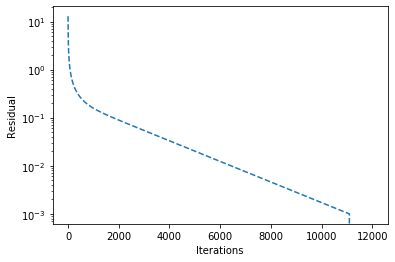

In [16]:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html
plt.xlabel('Iterations')
plt.ylabel('Residual')
plt.yscale('log') # set log scale in y
plt.plot(np.arange(max_iter),error,'--')
plt.show()

In [17]:
# Lets computet he anlytical solution
T_analytical = (T_right-T_left)*x+T_left


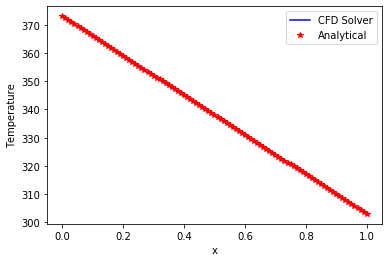

In [18]:
# plot final condition
# https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.xlabel('x')
plt.ylabel('Temperature')
plt.plot(x,T,'b-',label='CFD Solver')
plt.plot(x, T_analytical,'r*',label='Analytical')
plt.legend() 
plt.show()


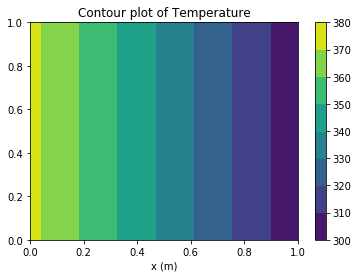

In [19]:
# contour plot
#############################
X, Y = np.meshgrid(x,x ) # create a dummy 2D grid 
# https://numpy.org/doc/stable/reference/generated/numpy.tile.html
# copy the 1D data to a 2D array
T2D = np.tile(T,(N,1))

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T2D)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour plot of Temperature')
ax.set_xlabel('x (m)')
plt.show()